<a href="https://colab.research.google.com/github/heloisebastos/Logica_Fuzzy_Classificacao_Cafe/blob/main/Helo%C3%ADse_Classificar_a_qualidade_de_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagine que você é o proprietário de uma cafeteria e deseja criar um sistema fuzzy para classificar a qualidade do café que seus baristas preparam. Você decidiu usar a temperatura e a quantidade de açúcar como entradas para o sistema e as classes de qualidade de café: "Ruim", "Regular" e "Bom".


Obs.: Para o problema de classificar a qualidade de um café com base na temperatura e na quantidade de açúcar

Primeiro, instale a biblioteca skfuzzy:



In [ ]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=e3e3cc9efb514b00b4525300d14ad6ddbc09d52b640bc624bbce829710d69ada
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Em seguida, importe as bibliotecas necessárias:


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Crie as variáveis de entrada e saída fuzzy:

In [ ]:
# Variáveis de entrada
temperatura = ctrl.Antecedent(np.arange(0, 101, 1), 'temperatura')
acucar = ctrl.Antecedent(np.arange(0, 11, 1), 'acucar')

#Adiciona a variavel de entrada safra
safra = ctrl.Antecedent(np.arange(0, 6, 1), 'safra')


# Variável de saída
qualidade = ctrl.Consequent(np.arange(0, 11, 1), 'qualidade')

#Adiciona a variavel de entrada avaliacao
avaliacao= ctrl.Consequent(np.arange(0, 6, 1), 'avaliacao')

Em seguida, vamos definir as funções de pertinência para cada variável fuzzy. Para a temperatura, vamos definir três funções: "baixa", "média" e "alta". Para o açúcar, vamos definir quatro funções: "nenhum", "pouco", "médio" e "muito". Para a qualidade, vamos definir três funções: "ruim", "regular" e "bom".

In [ ]:
# Funções de pertinência para temperatura
temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [0, 0, 40, 60])
temperatura['média'] = fuzz.trimf(temperatura.universe, [40, 60, 80])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [60, 80, 100])
temperatura['muito_alta'] = fuzz.trapmf(temperatura.universe, [80, 100, 120, 120])

# Funções de pertinência para açúcar
acucar['nenhum'] = fuzz.trimf(acucar.universe, [0, 0, 4])
acucar['pouco'] = fuzz.trimf(acucar.universe, [0, 4, 8])
acucar['médio'] = fuzz.trimf(acucar.universe, [4, 8, 10])
acucar['muito'] = fuzz.trimf(acucar.universe, [8, 10, 10])

# Funções de pertinência para qualidade
qualidade['ruim'] = fuzz.trapmf(qualidade.universe, [0, 0, 2, 4])
qualidade['regular'] = fuzz.trimf(qualidade.universe, [2, 4, 6])
qualidade['bom'] = fuzz.trimf(qualidade.universe, [4, 6, 8])
qualidade['excelente'] = fuzz.trapmf(qualidade.universe, [6, 8, 10, 10])


# Funções de pertinência para safra
safra['ruim'] = fuzz.trimf(safra.universe, [0, 0, 1])
safra['boa'] = fuzz.trimf(safra.universe, [0, 2, 3])
safra['muito_boa'] = fuzz.trimf(safra.universe, [2, 3, 4])

# Funções de pertinência para avaliacao
avaliacao['ruim'] = fuzz.trimf(avaliacao.universe, [0, 0, 2])
avaliacao['boa'] = fuzz.trimf(avaliacao.universe, [1, 2, 4])
avaliacao['excelente'] = fuzz.trimf(avaliacao.universe, [3, 5, 5])

Em seguida, vamos definir as regras fuzzy que governam o comportamento do sistema. Aqui, vamos usar algumas regras simples que representam a intuição humana para classificar a qualidade do café:




In [ ]:
# Bastantes regras
#'''
regra1 = ctrl.Rule(temperatura['baixa'] & acucar['nenhum'], qualidade['ruim'])
regra2 = ctrl.Rule(temperatura['média'] & acucar['nenhum'], qualidade['regular'])
regra3 = ctrl.Rule(temperatura['alta'] & acucar['nenhum'], qualidade['ruim'])
regra4 = ctrl.Rule(temperatura['muito_alta'] & acucar['nenhum'], qualidade['excelente'])
regra5 = ctrl.Rule(temperatura['baixa'] & acucar['pouco'], qualidade['regular'])
regra6 = ctrl.Rule(temperatura['média'] & acucar['pouco'], qualidade['bom'])
regra7 = ctrl.Rule(temperatura['alta'] & acucar['pouco'], qualidade['bom'])
regra8 = ctrl.Rule(temperatura['muito_alta'] & acucar['pouco'], qualidade['excelente'])
regra9 = ctrl.Rule(temperatura['baixa'] & acucar['médio'], qualidade['bom'])
regra10 = ctrl.Rule(temperatura['média'] & acucar['médio'], qualidade['bom'])
regra11 = ctrl.Rule(temperatura['alta'] & acucar['médio'], qualidade['regular'])
regra12 = ctrl.Rule(temperatura['muito_alta'] & acucar['médio'], qualidade['regular'])
regra13 = ctrl.Rule(temperatura['baixa'] & acucar['muito'], qualidade['ruim'])
regra14 = ctrl.Rule(temperatura['média'] & acucar['muito'], qualidade['ruim'])
regra15 = ctrl.Rule(temperatura['alta'] & acucar['muito'], qualidade['regular'])
regra16 = ctrl.Rule(temperatura['muito_alta'] & acucar['médio'], qualidade['regular'])

#adiciona novas regra17 a regra 28
regra17 = ctrl.Rule(temperatura['média'] & acucar['pouco'], qualidade['regular'])
regra18 = ctrl.Rule(temperatura['média'] & acucar['muito'], qualidade['ruim'])
#adiciona regras com variavel de entrada safra e variavel de saida avaliacao regra19 - regra28
regra19 = ctrl.Rule(temperatura['baixa'] & acucar['muito'] & safra['ruim'], (qualidade['ruim'], avaliacao['ruim']))
regra20 = ctrl.Rule(temperatura['média'] & acucar['pouco'] & safra['boa'], (qualidade['regular'], avaliacao['boa']))
regra21 = ctrl.Rule(temperatura['muito_alta'] & acucar['nenhum'] & safra['muito_boa'], (qualidade['excelente'], avaliacao['excelente']))
regra22 = ctrl.Rule(temperatura['baixa'] & acucar['nenhum'] & safra['ruim'], (qualidade['ruim'], avaliacao['ruim']))
regra23 = ctrl.Rule(temperatura['média'] & acucar['pouco'] & safra['ruim'], (qualidade['regular'], avaliacao['ruim']))
regra24 = ctrl.Rule(temperatura['alta'] & acucar['médio'] & safra['boa'], (qualidade['bom'], avaliacao['boa']))
regra25 = ctrl.Rule(temperatura['muito_alta'] & acucar['muito'] & safra['muito_boa'], (qualidade['excelente'], avaliacao['excelente']))
regra26 = ctrl.Rule(temperatura['média'] & acucar['médio'] & safra['muito_boa'], (qualidade['bom'], avaliacao['boa']))
regra27 = ctrl.Rule(temperatura['baixa'] & acucar['muito'] & safra['boa'], (qualidade['regular'], avaliacao['boa']))
regra28 = ctrl.Rule(temperatura['muito_alta'] & acucar['nenhum'] & safra['ruim'], (qualidade['ruim'], avaliacao['ruim']))

#'''


In [ ]:

#muitas regras
sistema=ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16,regra17, regra18])
simulador = ctrl.ControlSystemSimulation(sistema)

#altera is valores de entrada
simulador.input['temperatura']= 80
simulador.input['acucar']= 10
simulador.compute()
print(f"Qualidade : {simulador.output['qualidade']}")

# Sistema com a variavel de entrada safra e a variavel de saida avaliacao

print()
print("Qualidade e Avialação com a variavel de entrada safra ")
print()
sistema_safra = ctrl.ControlSystem([regra19, regra20, regra21, regra22, regra23, regra24, regra25, regra26, regra27, regra28])
simulador_safra = ctrl.ControlSystemSimulation(sistema_safra)

# Configurando as entradas para o simulador_safra
simulador_safra.input['temperatura'] = 60
simulador_safra.input['acucar'] = 3
simulador_safra.input['safra'] = 2

# Computando a saída
simulador_safra.compute()

# Acessando e imprimindo as saídas separadamente
print(f"Qualidade: {simulador_safra.output['qualidade']}")
print(f"Avaliação: {simulador_safra.output['avaliacao']}")




Qualidade : 3.9999999999999996

Qualidade e Avialação com a variavel de entrada safra 

Qualidade: 4.0
Avaliação: 2.3500000000000005


In [ ]:
# Computar a saída fuzzy
simulador.compute()

# Obter o valor da qualidade do café
qualidade_cafe = simulador.output['qualidade']

avaliacao_safra = simulador_safra.output['avaliacao']

print("Qualidade do café: ", qualidade_cafe)

print("Avaliação da safra: ", avaliacao_safra)


Qualidade do café:  3.9999999999999996
Avaliação da safra:  2.3500000000000005


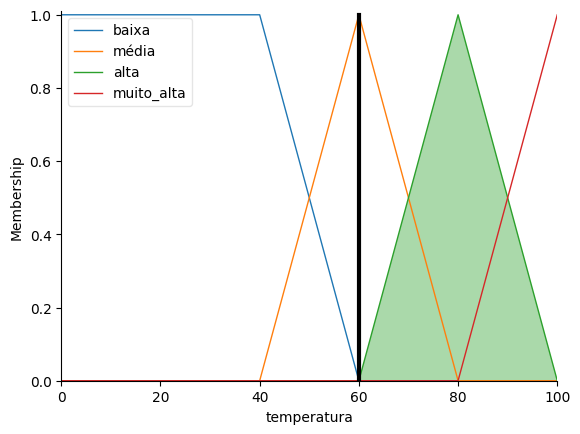

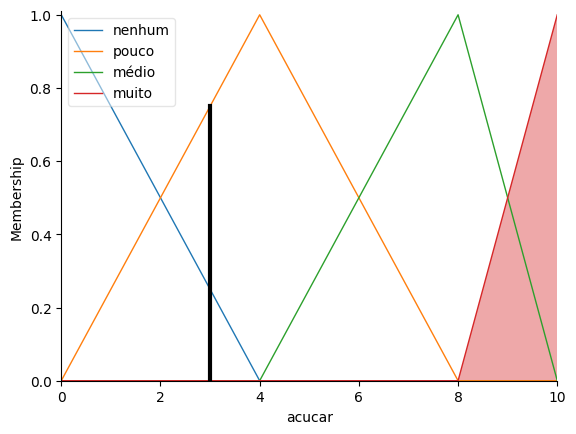

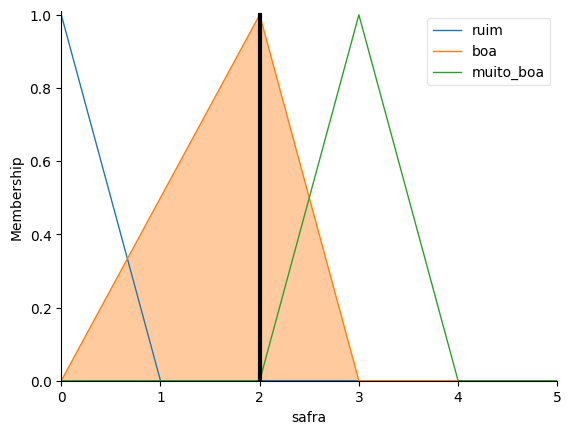

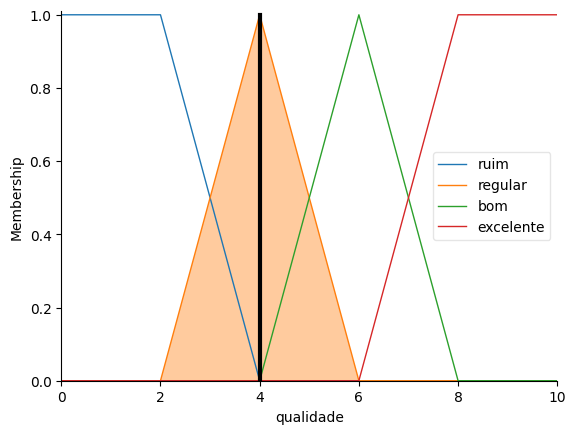

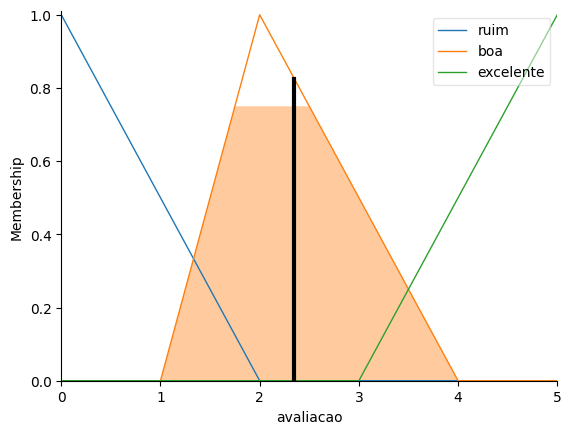

In [ ]:
 # Plotando os gráficos das funções de pertinência e do resultado
temperatura.view(simulador)
acucar.view(simulador)

#Plotando os gráficos das funções de pertinência e do resultado de safra,qualidade,avaliacao

safra.view(simulador_safra)
qualidade.view(simulador)
avaliacao.view(simulador_safra)

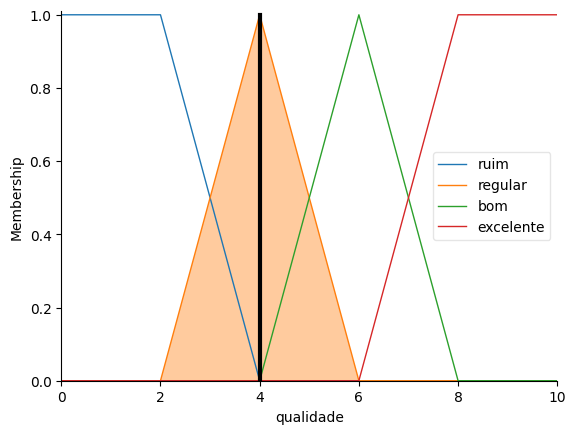

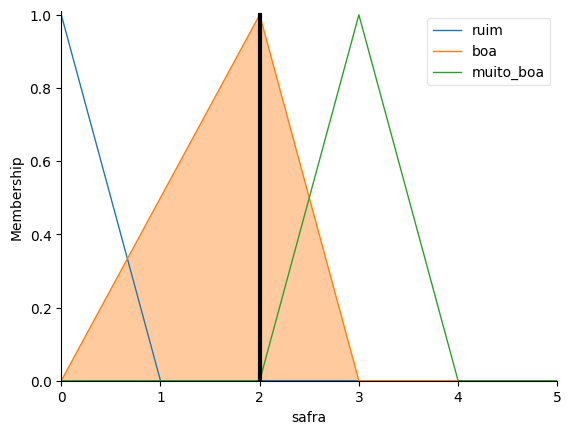

In [ ]:
qualidade.view(simulador)

safra.view(simulador_safra)